# Testing a Spatial Definition of Disk vs. Halo?

The goal of this code was to define a spatial cut to separate between disk and halo gas. I eventually switched back to using a thermodynamic cut, so this code is here only for future reference.

`-- Hollis Akins, May 25 2021 --`

In [1]:
from analysis import *

In [49]:
s = pynbody.load('/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096')
s.physical_units()
h = s.halos()

In [50]:
pynbody.analysis.angmom.faceon(h[1])

In [51]:
hubble = s.properties['h']
a = s.properties['a']
rmax = h[1].properties['Rvir']/hubble * a

In [59]:
bins = np.power(10, np.linspace(-1, np.log10(rmax), 100))
p = pynbody.analysis.profile.Profile(h[1].g, bins=bins)

In [60]:
p['rbins']

SimArray([1.04197832e-01, 1.12945933e-01, 1.22428495e-01, 1.32707181e-01,
          1.43848831e-01, 1.55925896e-01, 1.69016912e-01, 1.83207005e-01,
          1.98588451e-01, 2.15261271e-01, 2.33333886e-01, 2.52923816e-01,
          2.74158452e-01, 2.97175876e-01, 3.22125766e-01, 3.49170366e-01,
          3.78485539e-01, 4.10261916e-01, 4.44706131e-01, 4.82042166e-01,
          5.22512810e-01, 5.66381234e-01, 6.13932703e-01, 6.65476434e-01,
          7.21347605e-01, 7.81909531e-01, 8.47556033e-01, 9.18713996e-01,
          9.95846143e-01, 1.07945405e+00, 1.17008139e+00, 1.26831750e+00,
          1.37480118e+00, 1.49022488e+00, 1.61533916e+00, 1.75095762e+00,
          1.89796216e+00, 2.05730870e+00, 2.23003344e+00, 2.41725957e+00,
          2.62020457e+00, 2.84018816e+00, 3.07864084e+00, 3.33711320e+00,
          3.61728604e+00, 3.92098124e+00, 4.25017368e+00, 4.60700401e+00,
          4.99379262e+00, 5.41305471e+00, 5.86751663e+00, 6.36013365e+00,
          6.89410915e+00, 7.47291544e+

In [61]:
p['density']

SimArray([3.06493779e+08, 3.89549741e+08, 3.20185955e+08, 2.70629733e+08,
          3.78423869e+08, 2.86145305e+08, 2.97772769e+08, 2.51220660e+08,
          2.31104857e+08, 2.48268111e+08, 2.04522821e+08, 2.30312616e+08,
          2.26806196e+08, 2.24632790e+08, 2.01784235e+08, 1.97021263e+08,
          1.54955082e+08, 1.44606510e+08, 1.19969680e+08, 1.15214403e+08,
          1.07980827e+08, 1.15084151e+08, 8.97224745e+07, 7.97453146e+07,
          8.03799465e+07, 8.59954311e+07, 7.71095367e+07, 8.21981528e+07,
          9.15248428e+07, 9.64300920e+07, 9.91635803e+07, 9.63440775e+07,
          9.53857761e+07, 8.71636583e+07, 8.64856234e+07, 6.85598962e+07,
          5.12689019e+07, 4.25237350e+07, 3.03644408e+07, 2.36892083e+07,
          2.01472450e+07, 1.63223571e+07, 1.36190905e+07, 1.05806987e+07,
          9.10669530e+06, 7.83983463e+06, 6.81272936e+06, 5.68869007e+06,
          5.23884942e+06, 4.63261578e+06, 4.30446326e+06, 4.06668924e+06,
          3.69732923e+06, 3.33874933e+

In [63]:
bins = np.power(10, np.linspace(-1, np.log10(0.2*rmax), 500))
p2 = pynbody.analysis.profile.Profile(h[1].s, bins=bins)

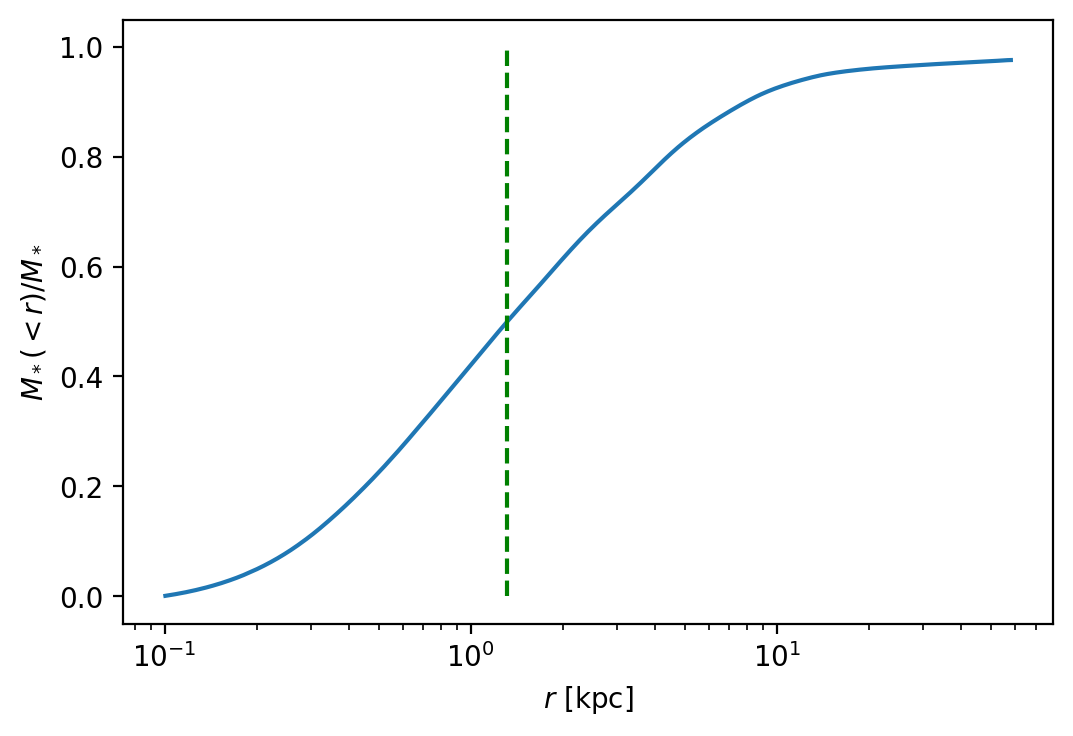

In [66]:
fig, ax = plt.subplots(dpi=200)
x = p2['rbins']
y = p2['mass_enc']/np.sum(h[1].s['mass'].in_units('Msol'))
ax.plot(x, y)
ax.semilogx()
ax.set_ylabel(r'$M_*(<r)/M_*$')
ax.set_xlabel(r'$r~[{\rm kpc}]$')

r_half = np.average([np.max(x[y < 0.5]), np.min(x[y > 0.5])])
ax.plot([r_half]*2, [0,1], 'g--')
#ax.axvline(x=r_half, ymin=0, rmax=1, fmt='r--')

plt.show()

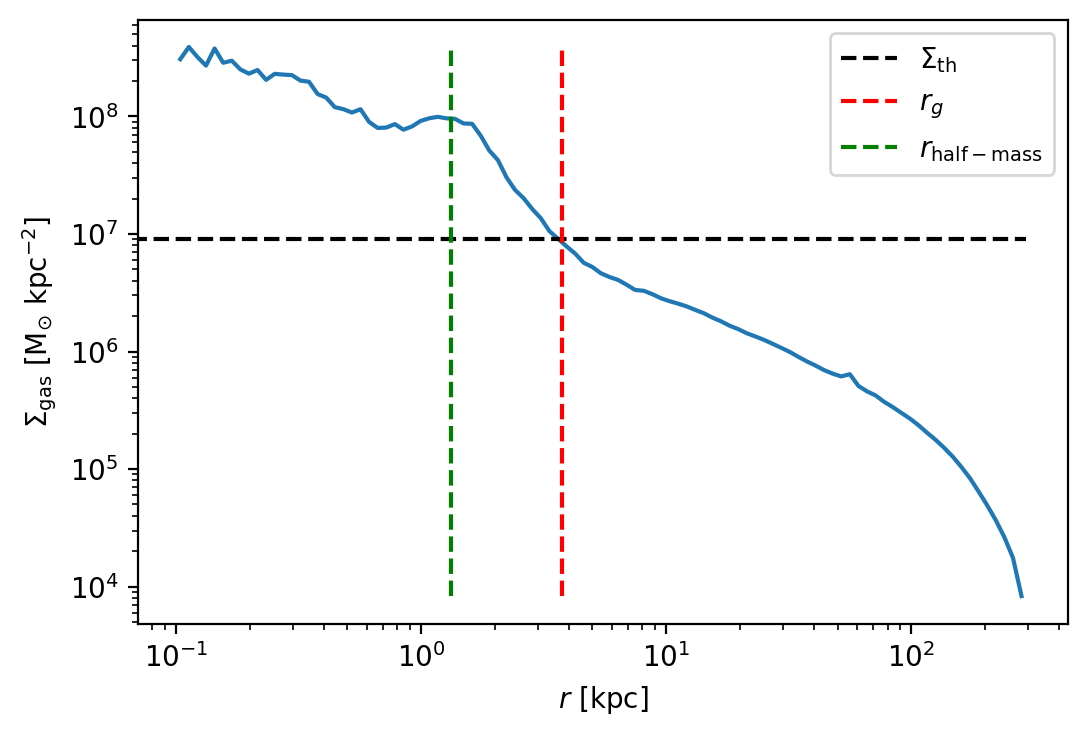

In [67]:
fig, ax = plt.subplots(1,1,dpi=200)

x = p['rbins']
y = p['density']

ax.plot(x,y)
ax.loglog()
ax.set_ylabel(r'$\Sigma_{\rm gas}~[{\rm M}_{\odot}~{\rm kpc}^{-2}]$')
ax.set_xlabel(r'$r~[{\rm kpc}]$')

sigma_th = 9e6 # minimum for star formation according to Kennicutt
ax.plot([0, rmax], [sigma_th, sigma_th], 'k--', label=r'$\Sigma_{\rm th}$')


rg = np.average([np.max(x[y > sigma_th]), np.min(x[y < sigma_th])])
ax.plot([rg,rg],[np.min(y),np.max(y)], 'r--', label=r'$r_g$')
ax.plot([r_half]*2, [np.min(y), np.max(y)], 'g--', label=r'$r_{\rm half-mass}$')

ax.legend()

plt.show()

In [68]:
print(f'r_half = {r_half:.1f} kpc')
print(f'r_g = {rg:.1f} kpc')
print(f'r_g = {rg/r_half:.1f} * r_half')

r_half = 1.3 kpc
r_g = 3.8 kpc
r_g = 2.9 * r_half


In [77]:
y = np.log10(np.array(h[1].g['temp'].in_units('K'),dtype=float))
x = np.log10(np.array(h[1].g['rho'].in_units('Msol kpc**-3'),dtype=float))
print(len(x))

1364926


In [71]:
r = np.array(h[1].g['r'].in_units('kpc'), dtype=float)

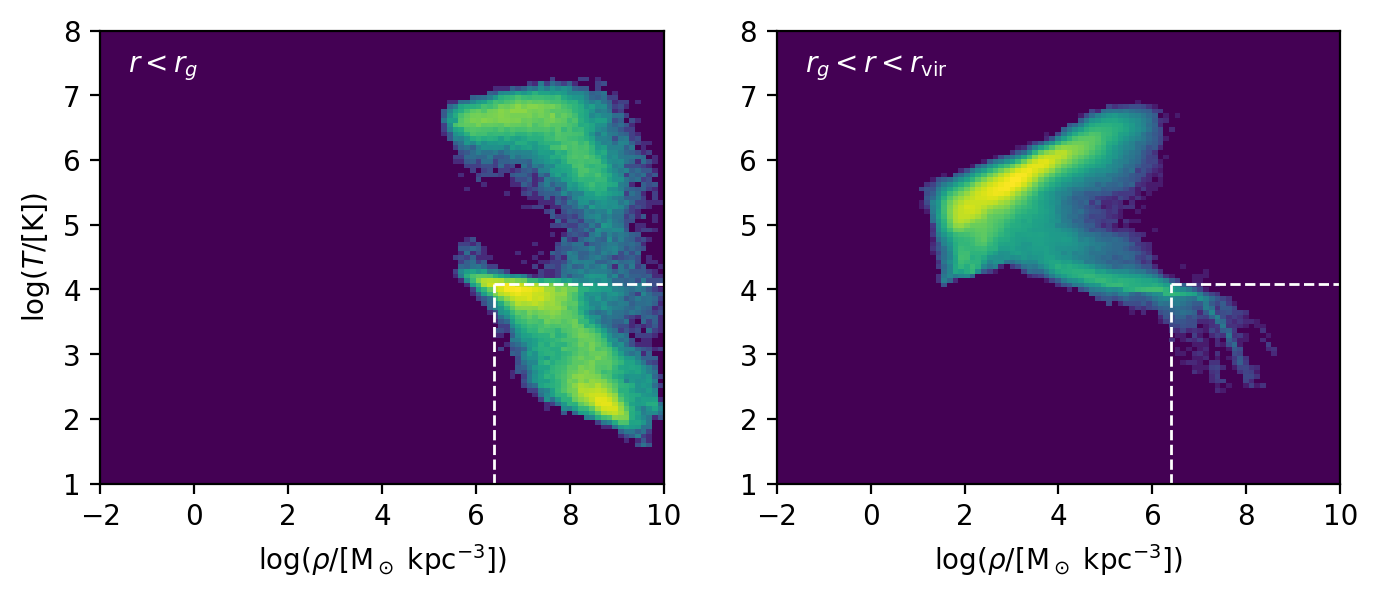

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(8,3))

xbins = np.linspace(-2, 10, 100)
ybins = np.linspace(1, 8, 100)

x2 = np.linspace(-2,10,2000)
y2 = np.linspace(1,8,2000)

cmap = mpl.cm.get_cmap('viridis')
norm = mpl.colors.LogNorm()
hist,xedges,yedges = np.histogram2d(x[r<rg], y[r<rg], bins=(xbins,ybins))
hist[hist==0] = 1
hist = hist.T
X, Y = np.meshgrid(xedges,yedges)
ax[0].pcolormesh(X,Y,hist, norm=norm, cmap=cmap)

ax[0].set_xlabel(r'$\log(\rho / [\mathrm{M}_\odot~\mathrm{kpc}^{-3}])$')
ax[0].set_ylabel(r'$\log(T/[{\rm K}])$')
ax[0].annotate(r'$r < r_g$', (0.05, 0.95), xycoords='axes fraction', va='top', color='w')

norm = mpl.colors.LogNorm()
hist,xedges,yedges = np.histogram2d(x[r>rg], y[r>rg], bins=(xbins,ybins))
hist[hist==0] = 1
hist = hist.T
X, Y = np.meshgrid(xedges, yedges)
ax[1].pcolormesh(X,Y,hist, norm=norm, cmap=cmap)

# ax[1].hist2d(x[r > rg], y[r > rg], bins=[xbins, ybins], norm=norm, cmap=cmap)
ax[1].set_xlabel(r'$\log(\rho / [\mathrm{M}_\odot~\mathrm{kpc}^{-3}])$')
ax[1].annotate(r'$r_g < r < r_{\rm vir}$', (0.05, 0.95), xycoords='axes fraction', va='top', color='w')

T_sf = 1.2e4
rho_sf = 0.1/4.077603812e-8

ax[0].plot([np.log10(rho_sf)]*2, [1,np.log10(T_sf)], 'w--', linewidth=1)
ax[0].plot([np.log10(rho_sf),10], [np.log10(T_sf)]*2, 'w--', linewidth=1)

ax[1].plot([np.log10(rho_sf)]*2, [1,np.log10(T_sf)], 'w--', linewidth=1)
ax[1].plot([np.log10(rho_sf),10], [np.log10(T_sf)]*2, 'w--', linewidth=1)




plt.show()

(100,)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams['figure.constrained_layout.use'] = False
mpl.rcParams.update({'font.size': 9})

age = 13.800797497330507

In [7]:
path = '../../Data/tracked_particles.hdf5'
with pd.HDFStore(path) as hdf:
    print('Available keys:', *hdf.keys())

Available keys: /h148_13 /h148_28 /h148_37 /h148_68 /h229_20 /h229_22 /h242_24 /h242_80


In [13]:
key = 'h148_37'
data = pd.read_hdf(path, key=key)

data

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,sat_Mstar,sat_Mgas,host_Mstar,host_Mgas,K_sat,U_sat,ratio_sat,K_host,U_host,ratio_host
0,7.336092,1661600,0.000183,22109.482422,26510.536704,0.000000,9.900299,0.315960,6.619176,7.029637,...,2571160.0,181951000.0,6.444690e+10,8.836550e+10,3.896594e+42,4.227641e+42,0.921695,7.363420e+44,7.663922e+43,9.607901
1,7.336092,2594124,0.000080,39495.566406,26510.536704,0.000000,18.803593,0.600101,-9.921370,14.621896,...,2571160.0,181951000.0,6.444690e+10,8.836550e+10,8.419373e+42,2.225900e+42,3.782459,9.035638e+44,7.711685e+43,11.716814
2,7.336092,2596167,1.205223,9366.929688,26523.181869,0.000000,1.097355,0.035021,0.194527,-0.725495,...,2571160.0,181951000.0,6.444690e+10,8.836550e+10,1.372718e+43,3.815982e+43,0.359729,7.021793e+44,7.579644e+43,9.264014
3,7.336092,2597379,0.000031,24536.974609,26510.536704,0.000000,36.375274,1.160886,-26.356499,25.060836,...,2571160.0,181951000.0,6.444690e+10,8.836550e+10,1.208948e+43,1.150642e+42,10.506726,9.349913e+44,7.589706e+43,12.319203
4,7.336092,2597670,0.244896,10484.209961,26511.622993,0.000000,1.719575,0.054879,1.711857,-0.158615,...,2571160.0,181951000.0,6.444690e+10,8.836550e+10,1.536874e+43,2.434126e+43,0.631386,7.234816e+44,7.594177e+43,9.526794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10600,13.800797,11938364,0.000036,162976.765625,26514.049442,0.000000,271.865314,6.141386,192.438718,-189.091908,...,3903300.0,39899100.0,1.311130e+11,1.370660e+11,2.445183e+44,3.655102e+40,6689.781256,2.936915e+43,2.118750e+44,0.138615
10601,13.800797,14043536,0.000017,458802.531250,26546.745189,0.000000,310.340458,7.010532,197.980018,-225.532535,...,3903300.0,39899100.0,1.311130e+11,1.370660e+11,1.417552e+44,3.205901e+40,4421.694879,3.561555e+43,2.220473e+44,0.160396
10602,13.800797,15737508,0.001099,17821.261719,26515.118461,0.000000,401.964694,9.080306,230.716332,-328.161756,...,3903300.0,39899100.0,1.311130e+11,1.370660e+11,4.085963e+44,2.472196e+40,16527.663515,4.165639e+44,4.147710e+44,1.004323
10603,13.800797,15752886,0.081413,9467.693359,26596.338000,0.000000,0.575402,0.012998,-0.260665,-0.354266,...,3903300.0,39899100.0,1.311130e+11,1.370660e+11,1.290648e+42,1.732319e+43,0.074504,1.284673e+44,1.232365e+44,1.042445
